In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

data = pd.read_csv('data/Iranian_Churn.csv')
data.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


### 전처리 이전 데이터 확인 과정

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [2]:
data.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [3]:
data.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [157]:
data.corr()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
Call Failure,1.000000,0.152879,0.169737,0.589028,0.501607,0.573349,-0.022282,0.504058,0.050406,0.192285,-0.114645,0.041758,0.121225,-0.008987
Complains,0.152879,1.000000,-0.020286,-0.033948,-0.104952,-0.090774,-0.111633,-0.058199,0.019976,0.001140,0.271405,0.003298,-0.132895,0.532053
Subscription Length,0.169737,-0.020286,1.000000,0.078789,0.124618,0.106534,0.076318,0.092009,0.021453,-0.159680,0.142841,-0.002430,0.109565,-0.032588
Charge Amount,0.589028,-0.033948,0.078789,1.000000,0.446738,0.379096,0.091533,0.415198,0.279679,0.324232,-0.356269,0.278955,0.169428,-0.202305
Seconds of Use,0.501607,-0.104952,0.124618,0.446738,1.000000,0.946489,0.102123,0.676536,0.020060,0.133593,-0.460618,0.020843,0.415087,-0.298935
Frequency of use,0.573349,-0.090774,0.106534,0.379096,0.946489,1.000000,0.100019,0.736114,-0.032544,0.206452,-0.454752,-0.028350,0.401572,-0.303337
Frequency of SMS,-0.022282,-0.111633,0.076318,0.091533,0.102123,0.100019,1.000000,0.079650,-0.053719,0.195686,-0.296164,-0.092798,0.924877,-0.220754
Distinct Called Numbers,0.504058,-0.058199,0.092009,0.415198,0.676536,0.736114,0.079650,1.000000,0.020941,0.172079,-0.413039,0.051037,0.284807,-0.278867
Age Group,0.050406,0.019976,0.021453,0.279679,0.020060,-0.032544,-0.053719,0.020941,1.000000,-0.150593,0.002506,0.960758,-0.183481,-0.014550
Tariff Plan,0.192285,0.001140,-0.159680,0.324232,0.133593,0.206452,0.195686,0.172079,-0.150593,1.000000,-0.164143,-0.119426,0.252298,-0.105853


In [158]:
data.rename(columns={'Subscription  Length':'Subscription Length', 'Call  Failure':'Call Failure', 'Charge  Amount':'Charge Amount', 'Frequency of use':'Frequency of Use'}, inplace=True)

In [159]:
data.columns

Index(['Call Failure', 'Complains', 'Subscription Length', 'Charge Amount',
       'Seconds of Use', 'Frequency of Use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

### 데이터 전처리

In [160]:
# Distinct Called Numbers의 수가 Frequency of use보다 높은 경우 삭제
data.drop(data[data['Frequency of Use'] < data['Distinct Called Numbers']].index, inplace=True)

# 컬럼 생성: 평균 통화 시간
data['Seconds per Use'] = data.apply(lambda row: (row['Seconds of Use'] / row['Frequency of Use']).round(2) if row['Frequency of Use'] > 0 else 0, axis=1)

# 컬럼 생성: 월 평균 통화 수 - Call per Month
data['Call per Month'] = data.apply(lambda row: (row['Frequency of Use'] / (row['Subscription Length'] if row['Subscription Length'] < 9 else 9)).round(2), axis=1)

# 컬럼 생성: 월 평균 문자 수 - SMS per Month
data['SMS per Month'] = data.apply(lambda row: (row['Frequency of SMS'] / (row['Subscription Length'] if row['Subscription Length'] < 9 else 9)).round(2), axis=1)

# 컬럼 생성: 월 평균 통화 시간 - SMS per Month
data['Seconds per Month'] = data.apply(lambda row: (row['Seconds of Use'] / (row['Subscription Length'] if row['Subscription Length'] < 9 else 9)).round(2), axis=1)

In [161]:
# 컬럼 생성: 이용 지수 - 통화 길이, 통화 횟수, SMS 횟수 표준화 이후 합산

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['Standard Seconds'] = scaler.fit_transform(data['Seconds of Use'].values.reshape(-1, 1))
data['Standard Call Freq'] = scaler.fit_transform(data['Frequency of Use'].values.reshape(-1, 1))
data['Standard SMS Freq'] = scaler.fit_transform(data['Frequency of SMS'].values.reshape(-1, 1))

data['Usage Index'] = data['Standard Seconds'] + data['Standard Call Freq'] + data['Standard SMS Freq']

del data['Standard Seconds']
del data['Standard Call Freq']
del data['Standard SMS Freq']

In [92]:
# 전처리 완료된 데이터프레임 파일로 내보내기
data.to_csv('data/Churn_Preprocess.csv', index=False)

### 시각화를 활용한 데이터 탐색 과정

In [79]:
data.corr()['Churn']

Call Failure              -0.001476
Complains                  0.538815
Subscription Length       -0.044942
Charge Amount             -0.201476
Seconds of Use            -0.302406
Frequency of Use          -0.303782
Frequency of SMS          -0.222832
Distinct Called Numbers   -0.271749
Age Group                 -0.009534
Tariff Plan               -0.107022
Status                     0.493410
Age                       -0.011046
Customer Value            -0.294510
Churn                      1.000000
Seconds per Use           -0.183773
Call per Month            -0.303418
SMS per Month             -0.222180
Seconds per Month         -0.300819
Usage Index               -0.362200
Name: Churn, dtype: float64

In [10]:
test = pd.DataFrame()
test['Longterm Customer'] = data['Subscription Length'] >= 12
test['Churn'] = data['Churn']

test.corr()

,Longterm Customer,Churn
Longterm Customer,1.00000,-0.14204
Churn,-0.14204,1.00000


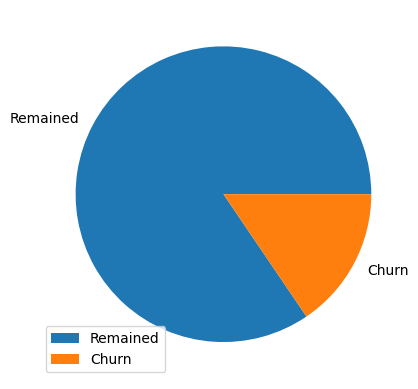

In [11]:
plt.pie(data['Churn'].value_counts().values, labels=['Remained', 'Churn'])
plt.legend()
plt.show()

<Axes: >

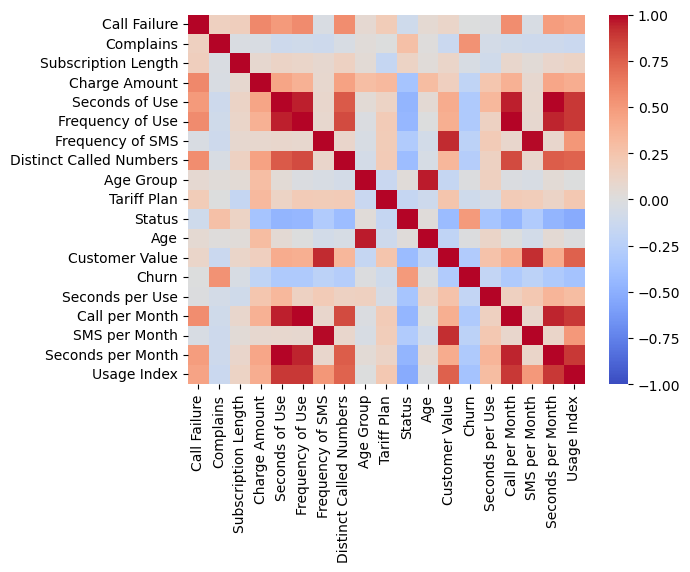

In [163]:
sns.heatmap(data.corr(), vmax=1.0, vmin=-1.0, cmap='coolwarm')

In [164]:
data = data.loc[:, ['Complains', 'Charge Amount', 'Distinct Called Numbers', 'Tariff Plan', 'Status', 'Customer Value', 'Churn', 'Usage Index']]

In [101]:
data.corr()

,Complains,Charge Amount,Distinct Called Numbers,Tariff Plan,Status,Customer Value,Churn,Usage Index
Complains,1.000000,-0.035293,-0.046109,-0.000373,0.275099,-0.139945,0.538815,-0.140597
Charge Amount,-0.035293,1.000000,0.458435,0.322443,-0.355237,0.160130,-0.201476,0.391973
Distinct Called Numbers,-0.046109,0.458435,1.000000,0.199534,-0.407331,0.342377,-0.271749,0.739970
Tariff Plan,-0.000373,0.322443,0.199534,1.000000,-0.165026,0.246855,-0.107022,0.226478
Status,0.275099,-0.355237,-0.407331,-0.165026,1.000000,-0.417747,0.493410,-0.529875
Customer Value,-0.139945,0.160130,0.342377,0.246855,-0.417747,1.000000,-0.294510,0.748597
Churn,0.538815,-0.201476,-0.271749,-0.107022,0.493410,-0.294510,1.000000,-0.362200
Usage Index,-0.140597,0.391973,0.739970,0.226478,-0.529875,0.748597,-0.362200,1.000000


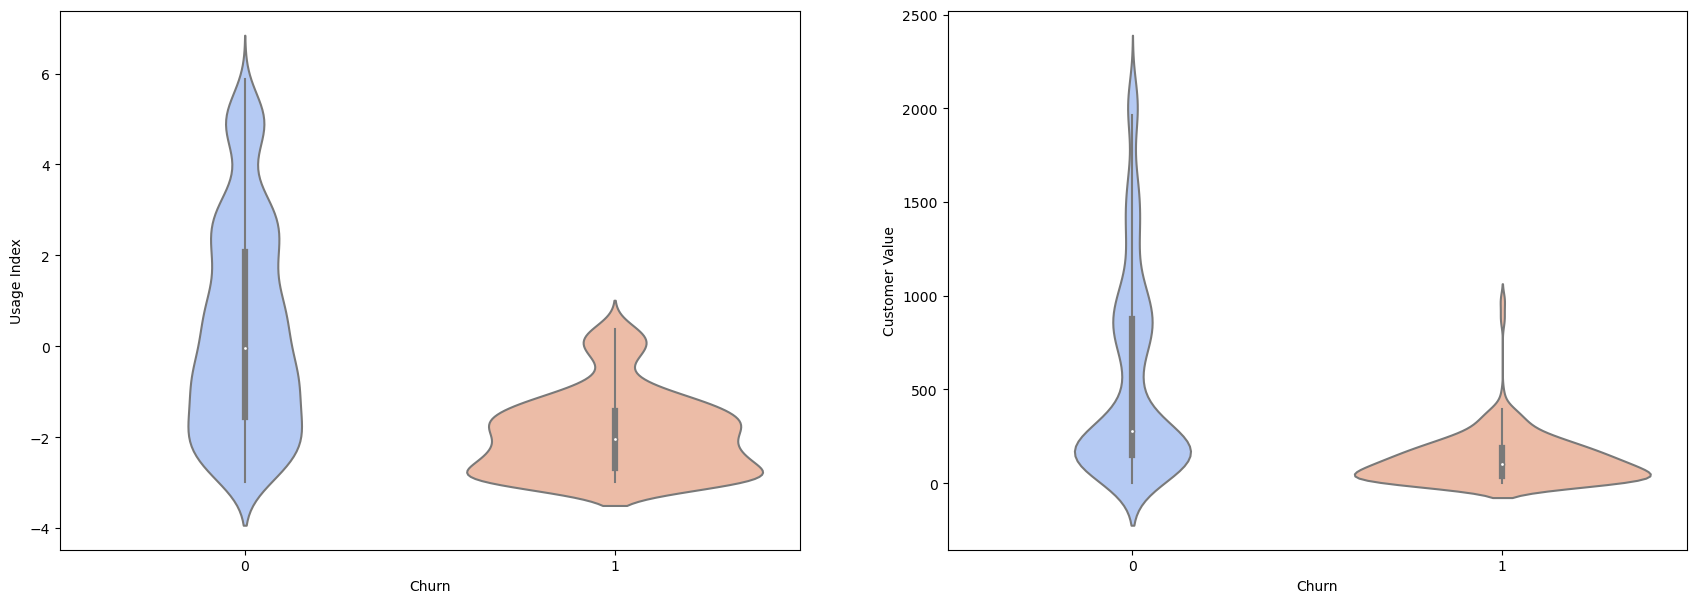

In [162]:
fig = plt.figure(figsize=(21, 7))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_xlabel('Churn')
ax1.set_ylabel('Usage Index')
sns.violinplot([data[data['Churn'] == 0]['Usage Index'], data[data['Churn'] == 1]['Usage Index']], ax=ax1, palette='coolwarm')

ax2.set_xlabel('Churn')
ax2.set_ylabel('Customer Value')
sns.violinplot([data[data['Churn'] == 0]['Customer Value'], data[data['Churn'] == 1]['Customer Value']], ax=ax2, palette='coolwarm')

plt.show()

In [95]:
data.to_csv('data/Model_Preprocess.csv', index=False)